<a href="https://colab.research.google.com/github/YesquenJP/Data-Science/blob/main/Machine%20Learning/3_Arboles_de_decisi%C3%B3n_o_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Caso : Mantenimiento de máquinas / Clasificación

## Lectura de datos

In [6]:
import pandas as pd
import numpy  as np
from sklearn import preprocessing
import plotly.express as px

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
machine_maintenance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/ai4i2020.csv', index_col=[0])
machine_maintenance.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [10]:
print(machine_maintenance.shape)
machine_maintenance.head()

(10000, 13)


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [11]:
# Data desbalanceada
print(machine_maintenance['Machine failure'].value_counts())
machine_maintenance['Machine failure'].value_counts()/machine_maintenance.shape[0]*100

0    9661
1     339
Name: Machine failure, dtype: int64


0    96.61
1     3.39
Name: Machine failure, dtype: float64

In [12]:
# contando categorias
machine_maintenance.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

## Usando Label Encoding

In [13]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
machine_maintenance['Type_le']= label_encoder.fit_transform(machine_maintenance['Type'])

machine_maintenance['Type_le'].unique()
## Orden alfanumerico es
## H (0) -> L (1) -> M (2)

array([2, 1, 0])

In [14]:
machine_maintenance.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [15]:
print(machine_maintenance.Type.value_counts())
machine_maintenance.Type_le.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64


1    6000
2    2997
0    1003
Name: Type_le, dtype: int64

## División de data de entrenamiento, de prueba y  balanceo de clases

In [16]:
predictoras = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]',
              'Tool wear [min]'] # definimos las variables "features" "predictoras", "independientes"
# target      = ['Machine failure']

In [17]:
X_all = machine_maintenance[predictoras]
y_all = machine_maintenance['Machine failure'] # nos quedamos únicamente con la columna con la variable a predecir
# nuestras variables predictoras son numericas

In [18]:
X_all.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,298.1,308.6,1551,42.8,0
2,298.2,308.7,1408,46.3,3
3,298.1,308.5,1498,49.4,5
4,298.2,308.6,1433,39.5,7
5,298.2,308.7,1408,40.0,9


In [19]:
from sklearn.model_selection import train_test_split

# num_test = 52
# test_sixe = tamaño de la data de prueba "data test"
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25, random_state=2022, stratify = y_all)
# sugerencia, cuando es problema de clasificación: usar stratify = y_all

In [20]:
from imblearn.combine import SMOTETomek
resample = SMOTETomek(random_state = 200)
# la tecnica de remuestreo smote
X_s, y_s = resample.fit_resample(X_train, y_train)
# balanceamos la data de entrenamiento

In [21]:
# verificando si estan balanceados o no (es la data de entrenamiento)
100*y_s.value_counts()/y_s.shape[0]

0    50.0
1    50.0
Name: Machine failure, dtype: float64

# Árbol de decisiones o clasificación

1. Arboles de clasificación (lo que veremos)
2. Arboles de regresión

- **Indice de Gini:** Mide el grado de impureza de un nodo.
- **Entropía:** Mide la incertidumbre o desorden en un nodo. Cuanto más bajo, más homogéneo es el nodo.
- **Ganancia de Información:** Cuantifica la reducción en la impureza. Ayuda a elegir la mejor característica para dividir el conjunto de datos y construir un árbol más puro.

Para poder construir el árbol de decisión se escoge la característica (variable) que genere mayor ganancia de información y así sucesivamente.

Ejemplo:
1. variable A - ganancia de información = 0.14
2. variable B - ganancia de información = 0.09
3. variable C - ganancia de información = 0.02

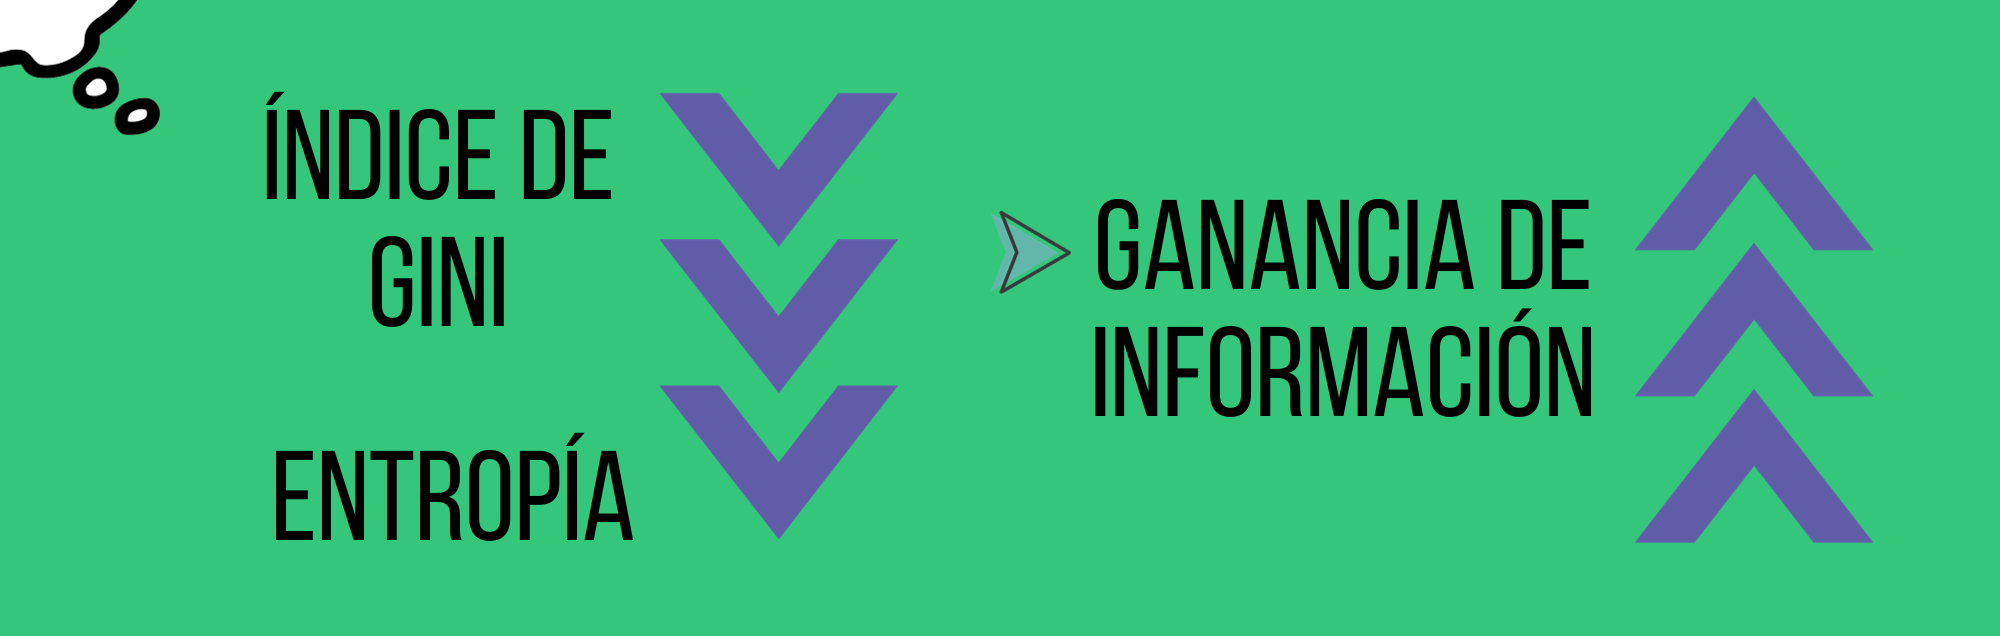

In [62]:
#@title Función para mostrar el árbol de decisión
# No es necesario que modifique esta función!
def draw_tree(tree, df):
    import graphviz
    from sklearn.tree import export_graphviz
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True, proportion=True) # si quito proportion se puedo ver la cantidad de los casos de 0 y 1
    return graphviz.Source(s)

## Construcción y visualización del árbol

In [63]:
# Paso 1: Definimos los parámetros del algoritmo
#-----------------------------------------------
from sklearn.tree import DecisionTreeClassifier
# Entrenamos un arbol con poca profundidad, para visualizarlo cómodamente:
# Entrenar un DecisionTreeClassifier() con profundidad máxima de 3, como criterio la impureza de gini, y con los demás parámetros por defecto
m =  DecisionTreeClassifier(max_depth = 3,random_state = 2021, criterion='gini')

# Paso 2: Entregamos los datos de entrenamiento & Paso 3: El aprendizaje del algoritmo se almacena en el objeto m
#-----------------------------------------------------------------------------------------------------------------
# m.fit(X_s, y_s) # con balanceo
m.fit(X_train, y_train) # sin balanceo

DecisionTreeClassifier(max_depth=3, random_state=2021)

In [64]:
from sklearn.tree import export_text
columnas = [col for col in X_all.columns]# observar en la fila anterior el objeto que retorna X_all.columns
r = export_text(m, feature_names=columnas)

print(r)

print("Las columnas son:", columnas)

|--- Torque [Nm] <= 65.00
|   |--- Torque [Nm] <= 13.15
|   |   |--- class: 1
|   |--- Torque [Nm] >  13.15
|   |   |--- Rotational speed [rpm] <= 1379.50
|   |   |   |--- class: 0
|   |   |--- Rotational speed [rpm] >  1379.50
|   |   |   |--- class: 0
|--- Torque [Nm] >  65.00
|   |--- Rotational speed [rpm] <= 1217.00
|   |   |--- Torque [Nm] <= 72.25
|   |   |   |--- class: 0
|   |   |--- Torque [Nm] >  72.25
|   |   |   |--- class: 1
|   |--- Rotational speed [rpm] >  1217.00
|   |   |--- Torque [Nm] <= 66.20
|   |   |   |--- class: 1
|   |   |--- Torque [Nm] >  66.20
|   |   |   |--- class: 1

Las columnas son: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


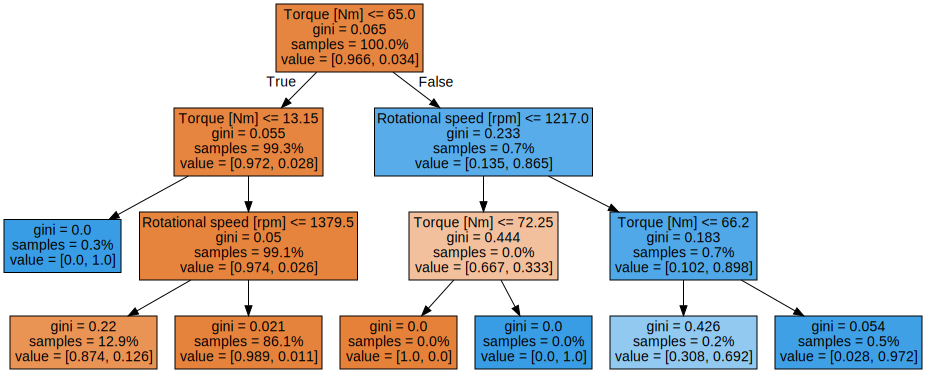

In [66]:
# Aplicamos la función gráfica del árbol / m: objeto del modelo entrenado & X_test:la data test
draw_tree(m, X_test)
# acordémonos que python coloca el orden de 0 y 1
# por lo tanto value [ casos de 0, casos de 1]

## Matriz de confusión

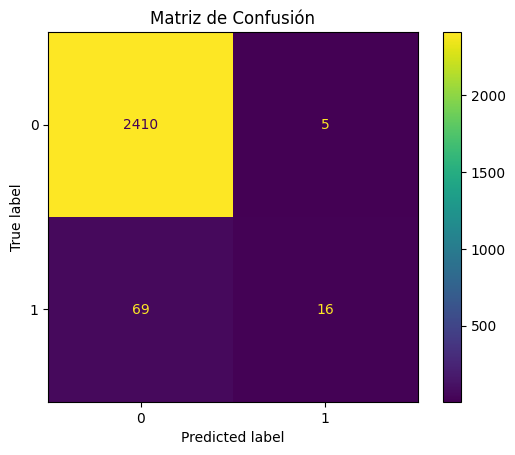

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

y_pred = m.predict(X_test)
conf_matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matriz, display_labels = m.classes_)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2415
           1       0.76      0.19      0.30        85

    accuracy                           0.97      2500
   macro avg       0.87      0.59      0.64      2500
weighted avg       0.97      0.97      0.96      2500



## Feature importance

In [50]:
m.feature_importances_

array([0.        , 0.        , 0.17852678, 0.82147322, 0.        ])

In [51]:
X_all.head(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,298.1,308.6,1551,42.8,0
2,298.2,308.7,1408,46.3,3
3,298.1,308.5,1498,49.4,5
4,298.2,308.6,1433,39.5,7


In [52]:
# Importancia
importance = m.feature_importances_
# Variables
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.17853
Feature: 3, Score: 0.82147
Feature: 4, Score: 0.00000


In [53]:
# Revisando el score de accuracy en la data de entrenamiento y de testing
print('Training set score Accuracy : {:.4f}'.format(m.score(X_train, y_train)))
print('Test set score Accuracy: {:.4f}'.format(m.score(X_test, y_test)))

Training set score Accuracy : 0.9740
Test set score Accuracy: 0.9704
